In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pima=pd.read_csv("diabetes.csv")

In [15]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
feature_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
x=pima[feature_cols]
y=pima.Outcome

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
A= logreg.fit(x_train,y_train)

In [20]:
x_pred = logreg.predict(x_train)
y_pred=logreg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


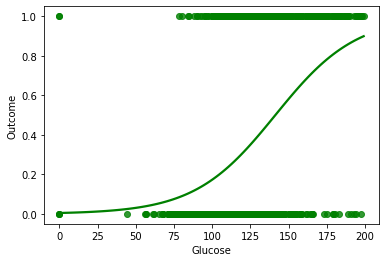

In [21]:
Log_Plot=sns.regplot(x['Glucose'],y,pima,logistic=True,ci=None,color="green");

[[117  13]
 [ 26  36]]


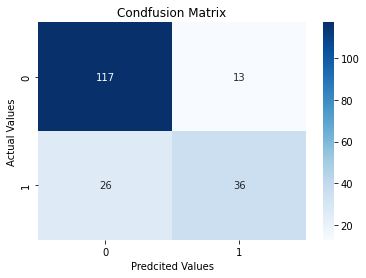

In [22]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)
sns.heatmap(cnf_matrix,annot=True,fmt='g', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predcited Values")
plt.title("Condfusion Matrix");

In [23]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))
print("precision",metrics.precision_score(y_test,y_pred))
print("recall",metrics.recall_score(y_test,y_pred))

accuracy 0.796875
precision 0.7346938775510204
recall 0.5806451612903226


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

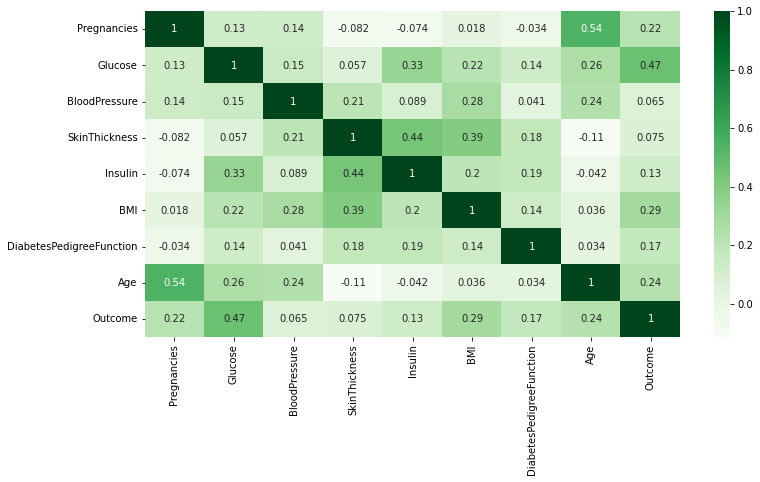

In [24]:
corr = pima.corr()
print(corr)
plt.figure(figsize=(12,6))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True,cmap="Greens")